In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
df = pd.read_csv('crypto_data.csv')
df["IsTrading"]=df["IsTrading"].apply(str)
df = df.rename(columns={'Unnamed: 0': 'Coin'})
df

,Coin,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [3]:
df.columns

Index(['Coin', 'CoinName', 'Algorithm', 'IsTrading', 'ProofType',
       'TotalCoinsMined', 'TotalCoinSupply'],
      dtype='object')

In [4]:

# df = df.set_index('Coin')

In [5]:
only_true = df.loc[df["IsTrading"] == 'True']
only_true

,Coin,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [6]:
no_trading = only_true.drop(["IsTrading"], axis=1)

no_trading.head()

,Coin,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [7]:
no_na=no_trading.dropna()
no_na.head()

,Coin,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [8]:

no_na = no_na.loc[no_na["TotalCoinsMined"] >= 0]
no_na

,Coin,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [9]:
no_coin_name = no_na.drop(["CoinName"], axis=1)
no_coin_name

,Coin,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
1238,ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Equihash,PoW,7.296538e+06,21000000


In [10]:
no_coin_name = no_coin_name.drop(["Coin"], axis=1)
no_coin_name.dtypes

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [11]:
# no_coin_name["TotalCoinSupply"] = no_coin_name["TotalCoinSupply"].astype(float)
# no_coin_name.dtypes

In [12]:
# X_dummies = pd.get_dummies(no_coin_name['Algorithm', 'ProofType'])
# X_dummies = pd.get_dummies(X_dummies['ProofType'])
X_dummies = pd.get_dummies(no_coin_name, columns=['Algorithm', 'ProofType'])

X_dummies

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0.000000e+00,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
X_scaled = StandardScaler().fit_transform(X_dummies)
X_scaled

array([[-0.10312268, -0.03826639, -0.03826394, ..., -0.03826394,
        -0.03826394, -0.03826394],
       [-0.07692584, -0.03826624, -0.03826394, ..., -0.03826394,
        -0.03826394, -0.03826394],
       [-0.10312268, -0.03826639, -0.03826394, ..., -0.03826394,
        -0.03826394, -0.03826394],
       ...,
       [-0.07878691, -0.03826599, -0.03826394, ..., -0.03826394,
        -0.03826394, -0.03826394],
       [-0.10294153, -0.03826638, -0.03826394, ..., -0.03826394,
        -0.03826394, -0.03826394],
       [-0.10311949, -0.03826639, -0.03826394, ..., -0.03826394,
        -0.03826394, -0.03826394]])

In [14]:
pca = PCA(n_components=0.9)

In [15]:
crypto_pca = pca.fit_transform(X_scaled)
crypto_pca

array([[-2.26762689e-01, -1.24705557e+00, -4.43753230e-01, ...,
         1.31196825e-12, -5.11769772e-13,  9.67110803e-14],
       [-2.12357604e-01, -1.24562956e+00, -4.44385788e-01, ...,
         1.31187975e-12, -5.11784487e-13,  9.70997032e-14],
       [-1.56176296e-01, -8.29298911e-01, -2.73512718e-01, ...,
         1.22315009e-14, -6.26347798e-15,  5.76820321e-15],
       ...,
       [-1.25952025e-01,  2.31596970e+00,  2.48549384e-01, ...,
         1.79024174e-14, -2.66360869e-14,  3.52986685e-15],
       [-2.81850828e-01,  2.03177848e+00,  2.30315053e-01, ...,
         1.31337722e-12, -5.11992806e-13,  9.54779780e-14],
       [-8.87009730e-02, -7.81973220e-01, -1.81555123e-01, ...,
         1.31246720e-12, -5.12763179e-13,  9.62204841e-14]])

In [16]:
df_crypto_pca = pd.DataFrame(data=crypto_pca)
df_crypto_pca

,0,1,2,3,4,5,6,7,8,9,...,73,74,75,76,77,78,79,80,81,82
0,-0.226763,-1.247056,-0.443753,-1.367902e-10,4.660279e-11,-5.757560e-08,3.475559e-10,0.001952,-1.113359,-0.290471,...,1.500959e-13,5.252680e-13,3.682189e-13,-4.110960e-13,-6.355358e-13,2.223390e-14,6.747494e-13,1.311968e-12,-5.117698e-13,9.671108e-14
1,-0.212358,-1.245630,-0.444386,-1.367901e-10,4.660280e-11,-5.757561e-08,3.475558e-10,0.000574,-1.116438,-0.291084,...,1.503312e-13,5.245072e-13,3.684548e-13,-4.113509e-13,-6.352244e-13,2.240713e-14,6.740147e-13,1.311880e-12,-5.117845e-13,9.709970e-14
2,-0.156176,-0.829299,-0.273513,-1.011320e-10,3.445444e-11,-4.256572e-08,2.569543e-10,-0.009525,-0.627418,-0.092659,...,-1.966504e-15,6.263012e-15,-4.844679e-15,3.865614e-15,8.158429e-15,-1.096149e-14,1.025838e-14,1.223150e-14,-6.263478e-15,5.768203e-15
3,0.286000,-1.982529,-0.480747,-2.012354e-10,6.855790e-11,-8.469671e-08,5.112898e-10,-0.043232,-0.829931,-0.235206,...,-2.683951e-14,-1.322488e-14,-1.868723e-14,-9.548930e-15,-1.654700e-15,-2.069026e-14,3.088618e-14,3.910181e-14,1.167339e-14,4.521378e-14
4,-0.211787,1.470995,0.116681,8.028364e-11,-2.735171e-11,3.378895e-08,-2.039836e-10,-0.001314,0.063770,0.080055,...,-2.840444e-15,5.788103e-15,-4.748009e-15,2.369859e-15,6.687170e-15,-1.098324e-14,9.982295e-15,1.142270e-14,-4.864768e-15,5.751093e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,4.073327,0.150109,-0.139943,-3.794949e-11,1.293010e-11,-1.597624e-08,9.641824e-11,-1.080804,0.741688,0.230250,...,-1.036434e-16,6.742066e-15,-6.613977e-15,1.102463e-14,1.185833e-14,-8.675957e-15,9.965993e-15,1.125969e-14,-5.223335e-15,3.134232e-15
680,-0.226559,-1.247035,-0.443762,-1.367902e-10,4.660284e-11,-5.757559e-08,3.475557e-10,0.001933,-1.113403,-0.290480,...,1.502963e-13,5.248165e-13,3.685429e-13,-4.111697e-13,-6.353558e-13,2.228855e-14,6.741823e-13,1.311929e-12,-5.118776e-13,9.706207e-14
681,-0.125952,2.315970,0.248549,1.543034e-10,-5.257031e-11,6.494195e-08,-3.920508e-10,0.004794,-0.011884,0.141240,...,2.833645e-14,5.464166e-14,-4.063909e-14,4.715223e-14,6.134014e-14,-4.182985e-14,2.377453e-14,1.790242e-14,-2.663609e-14,3.529867e-15
682,-0.281851,2.031778,0.230315,1.337626e-10,-4.557136e-11,5.629728e-08,-3.398632e-10,0.022867,0.160935,0.148707,...,1.513122e-13,5.257609e-13,3.677900e-13,-4.106396e-13,-6.346807e-13,2.540885e-14,6.719876e-13,1.313377e-12,-5.119928e-13,9.547798e-14


In [17]:
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate=35)

In [18]:
tsne_features = tsne.fit_transform(df_crypto_pca)
tsne_features.shape

(684, 2)

In [19]:
# The first column of transformed features
df_crypto_pca['x'] = tsne_features[:,0]

# The second column of transformed features
df_crypto_pca['y'] = tsne_features[:,1]

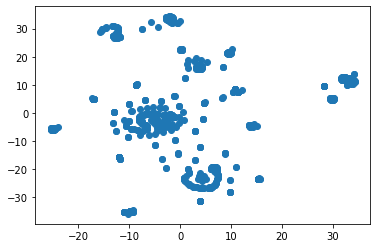

In [20]:
plt.scatter(df_crypto_pca['x'], df_crypto_pca['y'])
plt.show()

In [24]:
from sklearn.cluster import KMeans
inertia = []
k = list(range(1, 10))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_crypto_pca)
    inertia.append(km.inertia_)
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

C:\Users\Leo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,421876.518190
1,2,253435.282669
2,3,189335.206731
3,4,127613.349137
4,5,111857.068141


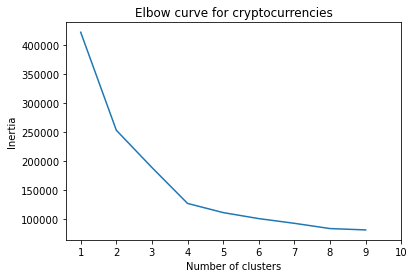

In [27]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for cryptocurrencies')
plt.show()

Looking at the data sample we where givem we could separate cryptocurrencies into four different clusters.